# Lab 6 Analisis de paquetes

## Diego Franco 20240

## Preabulo

In [16]:
## codigo aqui

## Analisis estadistico

In [17]:
import pandas as pd
from scapy.all import *
import matplotlib.pyplot as plt

In [18]:
# 1. Cargar el archivo pcap en una variable
archivo_pcap = "analisis_paquetes.pcap"

# 2. Leer el archivo pcap y convertirlo a DataFrame
paquetes = rdpcap(archivo_pcap)
data = []
for pkt in paquetes:
    if pkt.haslayer("IP"):
        src_ip = pkt["IP"].src
        dst_ip = pkt["IP"].dst
        src_port = pkt["IP"].sport
        dst_port = pkt["IP"].dport
        payload = len(pkt.payload)  # Obtiene el payload del paquete
        data.append((src_ip, dst_ip, src_port, dst_port, payload))

# Crear DataFrame y mostrar las primeras 5 filas
df = pd.DataFrame(data, columns=['Src Address', 'Dst Address', 'Src Port', 'Dst Port', 'Payload'])


print("Primeras 5 filas")

print(df.head)


Primeras 5 filas
<bound method NDFrame.head of     Src Address  Dst Address  Src Port  Dst Port  Payload
0    10.1.10.53  84.54.22.33        53        53      961
1   84.54.22.33   10.1.10.53        53        53       84
2    10.1.10.53  84.54.22.33        53        53      975
3   84.54.22.33   10.1.10.53        53        53       84
4    10.1.10.53  84.54.22.33        53        53     1012
..          ...          ...       ...       ...      ...
57  84.54.22.33   10.1.10.53        53        53       84
58   10.1.10.53  84.54.22.33        53        53      969
59  84.54.22.33   10.1.10.53        53        53       84
60   10.1.10.53  84.54.22.33        53        53      588
61  84.54.22.33   10.1.10.53        53        53       84

[62 rows x 5 columns]>


In [19]:
# 4. Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port.

# Imprimir los valores de la columna 'src' con un mensaje identificador
print("Valores de la columna 'Src Address':")
print(df['Src Address'])

# Imprimir los valores de la columna 'dst' con un mensaje identificador
print("\nValores de la columna 'Dst Address':")
print(df['Dst Address'])

# Imprimir los valores de la columna 'Src Port' con un mensaje identificador
print("\nValores de la columna 'Src Port':")
print(df['Src Port'])

# Imprimir los valores de la columna 'Dst Port' con un mensaje identificador
print("\nValores de la columna 'Dst Port':")
print(df['Dst Port'])


Valores de la columna 'Src Address':
0      10.1.10.53
1     84.54.22.33
2      10.1.10.53
3     84.54.22.33
4      10.1.10.53
         ...     
57    84.54.22.33
58     10.1.10.53
59    84.54.22.33
60     10.1.10.53
61    84.54.22.33
Name: Src Address, Length: 62, dtype: object

Valores de la columna 'Dst Address':
0     84.54.22.33
1      10.1.10.53
2     84.54.22.33
3      10.1.10.53
4     84.54.22.33
         ...     
57     10.1.10.53
58    84.54.22.33
59     10.1.10.53
60    84.54.22.33
61     10.1.10.53
Name: Dst Address, Length: 62, dtype: object

Valores de la columna 'Src Port':
0     53
1     53
2     53
3     53
4     53
      ..
57    53
58    53
59    53
60    53
61    53
Name: Src Port, Length: 62, dtype: int64

Valores de la columna 'Dst Port':
0     53
1     53
2     53
3     53
4     53
      ..
57    53
58    53
59    53
60    53
61    53
Name: Dst Port, Length: 62, dtype: int64


In [20]:
# a. Mostrar todas las IP origen
print("a. Todas las IP origen:")
print(df['Src Address'].unique())

# b. Mostrar todas las IP destino
print("\nb. Todas las IP destino:")
print(df['Dst Address'].unique())

# c. IP origen más frecuente
ip_origen_mas_frecuente = df['Src Address'].mode()[0]
print("\nc. La IP origen más frecuente es:", ip_origen_mas_frecuente)

# i. A qué IP destino se comunica con más frecuencia
ip_destino_comunicacion_frecuente = df[df['Src Address'] == ip_origen_mas_frecuente]['Dst Address'].mode()[0]
print("\ni. La IP destino a la que se comunica con más frecuencia es:", ip_destino_comunicacion_frecuente)

# ii. A qué puerto destino se comunica y cuál es el propósito de este puerto
puerto_destino_comunicacion_frecuente = df[(df['Src Address'] == ip_origen_mas_frecuente) & (df['Dst Address'] == ip_destino_comunicacion_frecuente)]['Dst Port'].mode()[0]
print("\nii. El puerto destino al que se comunica con más frecuencia es:", puerto_destino_comunicacion_frecuente)

print("\nPropósito del puerto destino: El puerto 53 se utiliza para la comunicación entre los dispositivos de los usuarios de la AppStream versión 2.0 y sus servidores DNS. ")

# iii. Desde qué puertos origen se comunica
puertos_origen_comunicacion = df[df['Src Address'] == ip_origen_mas_frecuente]['Src Port'].unique()
print("\niii. Desde qué puertos origen se comunica:")
print(puertos_origen_comunicacion)

a. Todas las IP origen:
['10.1.10.53' '84.54.22.33' '75.75.75.75']

b. Todas las IP destino:
['84.54.22.33' '10.1.10.53' '75.75.75.75']

c. La IP origen más frecuente es: 10.1.10.53

i. La IP destino a la que se comunica con más frecuencia es: 84.54.22.33

ii. El puerto destino al que se comunica con más frecuencia es: 53

Propósito del puerto destino: El puerto 53 se utiliza para la comunicación entre los dispositivos de los usuarios de la AppStream versión 2.0 y sus servidores DNS. 

iii. Desde qué puertos origen se comunica:
[   53 15812 23903]


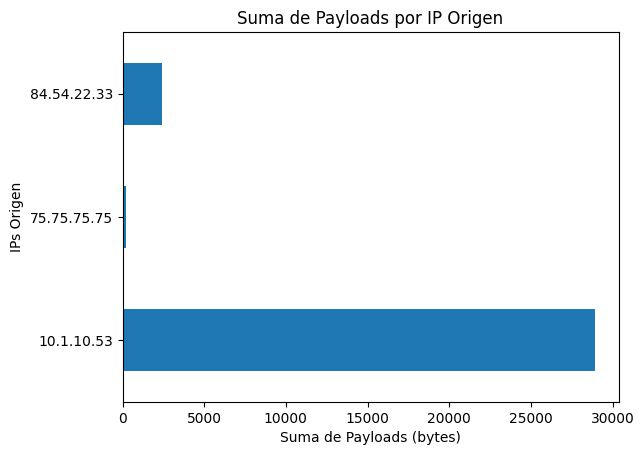

In [21]:
# a. Gráfica de barras 2D horizontales para IPs origen y suma de payloads
payloads_por_ip_origen = df.groupby('Src Address')['Payload'].sum()
payloads_por_ip_origen.plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('IPs Origen')
plt.title('Suma de Payloads por IP Origen')
plt.show()

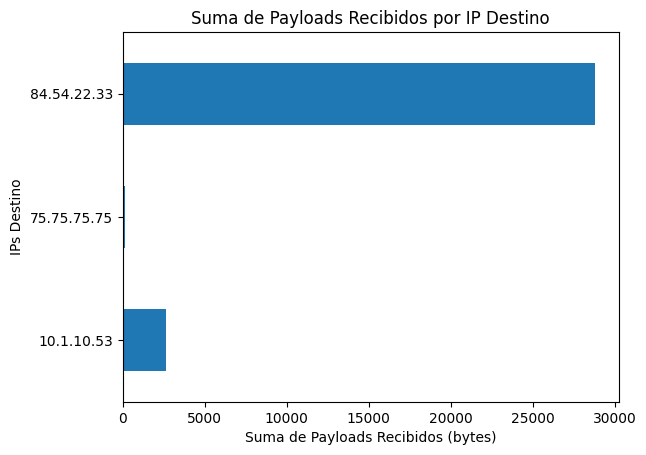

In [22]:
# b. Gráfica de barras 2D horizontales para IPs destino y suma de payloads recibidos
payloads_por_ip_destino = df.groupby('Dst Address')['Payload'].sum()
payloads_por_ip_destino.plot(kind='barh')
plt.xlabel('Suma de Payloads Recibidos (bytes)')
plt.ylabel('IPs Destino')
plt.title('Suma de Payloads Recibidos por IP Destino')
plt.show()

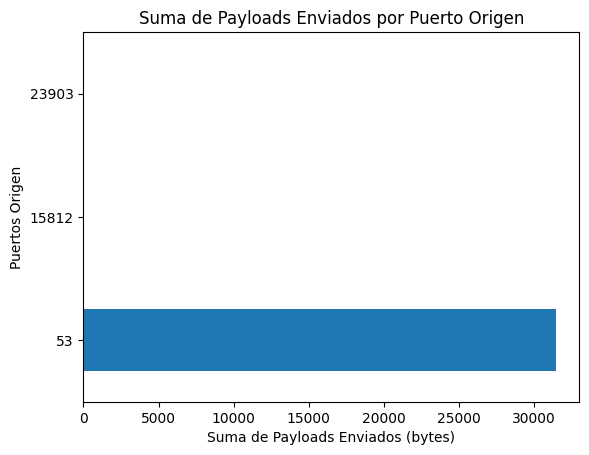

In [23]:
# c. Gráfica de barras 2D horizontales para puertos origen y suma de payloads enviados
payloads_por_puerto_origen = df.groupby('Src Port')['Payload'].sum()
payloads_por_puerto_origen.plot(kind='barh')
plt.xlabel('Suma de Payloads Enviados (bytes)')
plt.ylabel('Puertos Origen')
plt.title('Suma de Payloads Enviados por Puerto Origen')
plt.show()

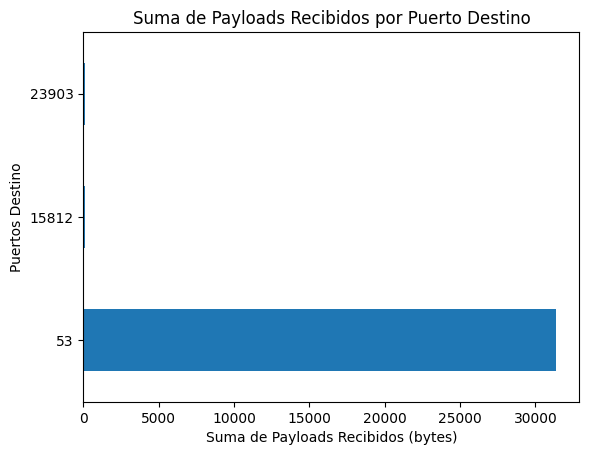

In [24]:
# d. Gráfica de barras 2D horizontales para puertos destino y suma de payloads recibidos
payloads_por_puerto_destino = df.groupby('Dst Port')['Payload'].sum()
payloads_por_puerto_destino.plot(kind='barh')
plt.xlabel('Suma de Payloads Recibidos (bytes)')
plt.ylabel('Puertos Destino')
plt.title('Suma de Payloads Recibidos por Puerto Destino')
plt.show()

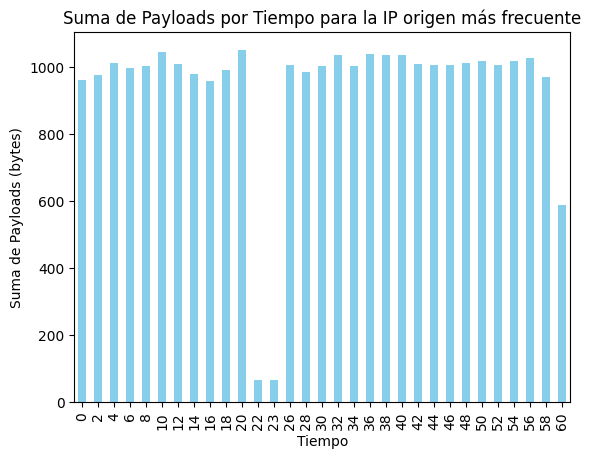

In [25]:
# e. Gráfica de barras 2D verticales para tiempo y suma de payloads de la IP origen más frecuente
payloads_por_tiempo = df[df['Src Address'] == ip_origen_mas_frecuente].reset_index().groupby('index')['Payload'].sum()
payloads_por_tiempo.plot(kind='bar', color='skyblue')
plt.ylabel('Suma de Payloads (bytes)')
plt.xlabel('Tiempo')
plt.title('Suma de Payloads por Tiempo para la IP origen más frecuente')
plt.show()

### f Utilizando la información de las estadísticas y la información del comportamiento del tráfico que las gráficas muestran, describa que es lo que está sucediendo. ¿Es común el comportamiento?

En general, el comportamiento descrito parece indicar una comunicación constante y significativa entre las IP '10.1.10.53' y '84.54.22.33', especialmente a través del puerto 53. Si estas IP y puertos están asociados con servicios o aplicaciones específicas en la red, este comportamiento podría considerarse común. Sin embargo, cualquier desviación significativa de este patrón o actividad inusual podría requerir una mayor investigación para determinar si hay problemas o anomalías en la red.